In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Lecture 8: Bias-Variance Trade Off, Feature Extraction and Naive Bayes Classifier

## Bias-Variance Trade Off

When your model is too overly simplified, you are likely to run into a situation where you model is underfitting, performing poorly. In this case, it can be said that your model has a **high bias**. However, if you train the model again using a different set of data sampled from the same distribution, the newly trained model will be similar to the previous one. We say that it has a **low variance**.

Bias-variance trade off is closely related to overfitting and underfitting. When your model has high bias, it's likely to underfit and you will need to increase the complexity of your model to reduce the bias. One way to achieve this is to increase the number of features. On the other hand, when your model has high variance, it's likely to overfit and you will need to remove complexity of the model (e.g. removing some features), or **increase** the size of the training set. 

If the model complexity is fixed, the more data you have, the less likely it is to overfit.

A biased model is sometimes needed in situations where the number of training examples is low. 

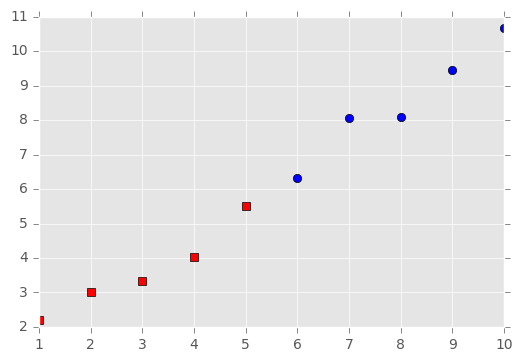

In [16]:
import random

random.seed(0)
train_data = [(i,i+random.random()*2-0.5) for i in range(1,6)]
trn_x,trn_y = zip(*train_data)
test_data = [(i,i+random.random()*2-0.5) for i in range(6,11)]
tst_x,tst_y = zip(*test_data)

plt.plot(trn_x, trn_y, 'sr')
plt.plot(tst_x, tst_y, 'ob')

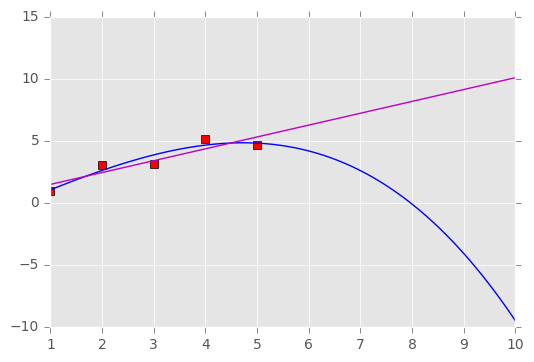

In [24]:
# What the scientists see
plt.plot(trn_x, trn_y, 'sr')

# Scientist 1
# Hmm... data look like poly with degree 3
p1 = np.poly1d(np.polyfit(trn_x, trn_y, deg=3))
x = np.linspace(1,10,100)
plt.plot(x,p1(x),'-b')

# Scientist 2
# Nah... I feel like the data should be linear because blah blah.
p2 = np.poly1d(np.polyfit(trn_x, trn_y, deg=1))
plt.plot(x,p2(x),'-m')

(-50, 50)

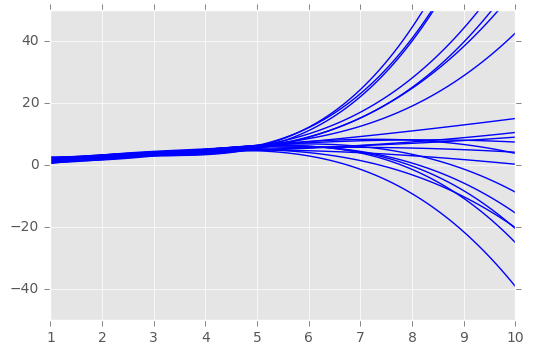

In [29]:
# Variation of scientist 1's models from multiple training sets
for j in range(20):
    train_data = [(i,i+random.random()*2-0.5) for i in range(1,6)]
    trn_x,trn_y = zip(*train_data)
    p1 = np.poly1d(np.polyfit(trn_x, trn_y, deg=3))
    x = np.linspace(1,10,100)
    plt.plot(x,p1(x),'-b')
plt.ylim([-50,50])

(-50, 50)

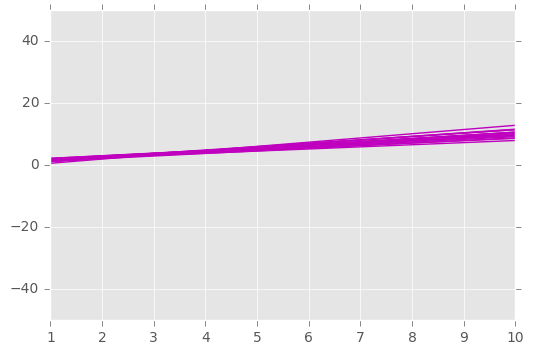

In [30]:
# Variation of scientist 2's models from multiple training sets
for j in range(20):
    train_data = [(i,i+random.random()*2-0.5) for i in range(1,6)]
    trn_x,trn_y = zip(*train_data)
    p2 = np.poly1d(np.polyfit(trn_x, trn_y, deg=1))
    x = np.linspace(1,10,100)
    plt.plot(x,p2(x),'-m')
plt.ylim([-50,50])

## Feature Extraction and Selection

If you are lucky, the features will be given to you. However, sometimes, you will have to invent features yourself. For example, in the "leaf" dataset, each example is an image and the features are measurements derived from the image.  
Feature extraction is a challenging task. Most of the time, you will need domain expertise to know exactly which features to choose and to add the model. Imagine trying to build a spam filter to predict whether an email is junk or not. Most models won’t know what to do with a raw email, which is just a collection of text. You’ll have to extract features. For example:

- Does the email contain the word “Viagra”?
- How many times does the letter d appear?
- What was the domain of the sender?


In [62]:
text = """
If you are lucky, the features will be given to you. However, sometimes, you will have to invent features yourself. For example, in the "leaf" dataset, each example is an image and the features are measurements derived from the image.
Feature extraction is a challenging task. Most of the time, you will need domain expertise to know exactly which features to choose and to add the model. Imagine trying to build a spam filter to predict whether an email is junk or not. Most models won’t know what to do with a raw email, which is just a collection of text. You’ll have to extract features. For example:
"""

import re
words = {}
# match three or more non-whitespace characters 
for eachtok in re.findall(r"\w{3,}",text):
    words[eachtok] = words.get(eachtok,0) + 1

#sorted_words = sorted(words.items(),key=lambda x: x[1],reverse=True)
sorted_words = sorted(words.items(),key=lambda x: len(x[0]),reverse=True)

print "how many times does the word 'the' appear?", words['the']
print "does the message contain 'spam'?", words['spam'] > 0
print "does the message contain a word with more than 6 characters?", len(sorted_words[0][0]) > 6

how many times does the word 'the' appear? 6
does the message contain 'spam'? True
does the message contain a word with more than 6 characters? True


## Naive Bayes Classifier

Take notes here: